## A simple K-Mean alogrithm to cluster a set of self-created random data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Create the random dataset first

# Values in cluster 1
x1 = np.random.randint(0,150,70)
y1 = np.random.randint(0,100,70)

# Values in cluster 2
x2 = np.random.randint(200,300,70)
y2 = np.random.randint(100,300,70)

m = 140

# Concatenate both the clusters in a single dataset
x = np.concatenate((x1, x2), axis = 0)
y = np.concatenate((y1, y2), axis = 0)

## We have got our x and y values in the dataset. Now we want to implement the k-mean algorithm

In [3]:
df = pd.DataFrame(dict(x = x, y = y))

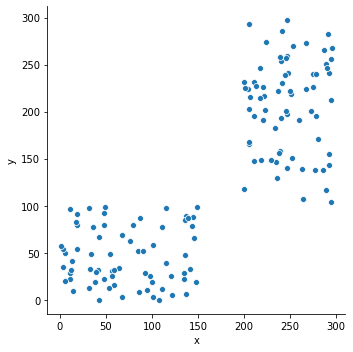

In [4]:
# Visualising the random data we have got
sns.relplot(data = df, x = 'x', y = 'y')

In [5]:
# Creating a new clustering column which will store the algorithm classification

df['type'] = 2
df

,x,y,type
0,31,13,2
1,3,35,2
2,144,88,2
3,111,11,2
4,56,31,2
...,...,...,...
135,217,246,2
136,287,265,2
137,220,226,2
138,290,246,2


## Main algorithm:

In [6]:
## random initialization, point-allocation and mean-relocation

val = df.values

def eucledian_sq_distance(x,mu):
    return (x[0] - mu[0])**2 + (x[1] - mu[1])**2

k = 2

np.random.shuffle(val)
mu1 = val[:k]
print(mu1)
mu = mu1.copy()
p = 0
while(np.array_equal(mu, mu1) or p==0):
    p+=1
    mu = mu1.copy()
    for i in range(m):
        ds = val[i]
        min_val = 100000000
        ind = -1
        for j in range(k):
            d = eucledian_sq_distance(ds, mu[j])
            if(d<min_val):
                ind = j
                min_val = d
        val[i][2] = ind
    #Now, all values are assigned, let's reset the values of mu
    temp_df = pd.DataFrame(data = {'x' : val[:,0], 'y' : val[:,1], 'type': val[:,2]})
    temp_df.groupby(['type']).mean().sort_values('type')
    mu1 = temp_df.iloc[:, 1].values
    

[[ 11  29   2]
 [275 240   2]]


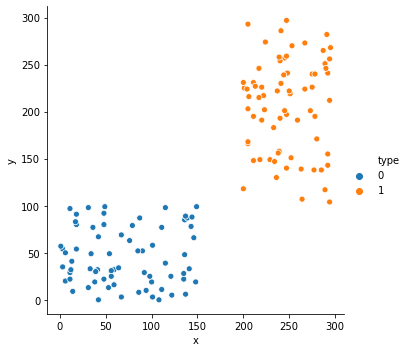

In [7]:
df2 = pd.DataFrame(data = {'x' : val[:,0], 'y' : val[:,1], 'type': val[:,2]})
sns.relplot(data = df2, x = 'x', y = 'y', hue = 'type')

## It can be seen that the algorithm correctly clustered all the points in the data correctly. 

Accuracy was attained by running the algorithm multiple times. The above plot tells the most optimum results attained